<a href="https://colab.research.google.com/github/VirtueZhao/Dive_into_Deep_Learning/blob/main/3_2_Linear_Regression_Implementation_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import random
import torch
import d2l as d2l

In [5]:
def synthetic_data(w, b, num_examples):
  X = torch.normal(0,1,(num_examples,len(w)))
  y = torch.matmul(X,w) + b
  y += torch.normal(0,0.01,y.shape)
  # print(y)
  y_reshape = y.reshape((-1,1))
  # print(y_reshape)

  return X,y.reshape((-1,1))

In [6]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [7]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([ 1.9812, -0.8074]) 
label: tensor([10.9130])


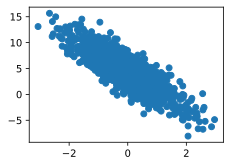

In [8]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(), labels.detach().numpy())

In [9]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)

  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [10]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tensor([[-0.6736,  0.5569],
        [-0.0242,  0.4446],
        [-0.0878, -1.2778],
        [-0.4401, -0.1164],
        [ 0.3441, -0.1878],
        [-0.0146, -1.8296],
        [-0.9947, -0.8360],
        [-0.0461,  0.9234],
        [-1.3055, -1.0051],
        [ 1.2358,  2.1885]]) 
 tensor([[ 0.9563],
        [ 2.6606],
        [ 8.3732],
        [ 3.7065],
        [ 5.5195],
        [10.3941],
        [ 5.0432],
        [ 0.9712],
        [ 4.9884],
        [-0.7548]])


In [11]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print("w: " + str(w))
print("b: " + str(b))

w: tensor([[-0.0054],
        [-0.0002]], requires_grad=True)
b: tensor([0.], requires_grad=True)


In [12]:
def linreg(X, w, b):
  return torch.matmul(X, w) + b

In [13]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [66]:
def sgd(params, lr, batch_size):
  with torch.no_grad():
    # print("w: " + str(w))
    # print("w.grad: " + str(params[0].grad))
    # print("b: " + str(b))
    # print("b.grad: " + str(params[1].grad))
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()
    # print("w: " + str(w))
    # print("b: " + str(b))

In [72]:
lr = 0.03
num_epochs = 3
net = linreg
loss =squared_loss

In [22]:
for epoch in range(num_epochs):
  for X,y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    sgd([w, b], lr, batch_size)
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000048


In [74]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 6.6280e-05, -9.9134e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0006], grad_fn=<RsubBackward1>)


In [73]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

for epoch in range(num_epochs):
  for X,y in data_iter(batch_size, features, labels):
    y_hat = linreg(X, w, b)
    # print("Prediction: " + str(y_hat))

    l = (loss(y_hat, y))
    # print("Loss: " + str(l))
    # print("L.sum: " + str(l.sum()))

    l.sum().backward()
    sgd([w, b], lr, batch_size)

  with torch.no_grad():
    y_hat = linreg(features, w, b)
    # print(y_hat)
    train_loss = loss(y_hat, labels)
    print(f'Epoch {epoch + 1} - Loss: {float(train_loss.mean()):f}')

Epoch 1 - Loss: 0.043600
Epoch 2 - Loss: 0.000172
Epoch 3 - Loss: 0.000048


In [64]:
print(-0.0095 - 0.03 * (-12.2930 / 10))
print(-0.0054 - 0.03 * (38.3135 / 10))
print(0 - 0.03 * (-47.0379 / 10))

0.027378999999999994
-0.12034049999999999
0.14111369999999998
